In [49]:
import pandas as pd
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns

import re 

plt.style.use('fivethirtyeight')
pd.options.display.max_columns=50
pd.options.display.max_rows=50


In [50]:
!head -n5 data/users.dat data/ratings.dat data/movies.dat



==> data/users.dat <==
1::139564917
2::17528189
3::522540374
4::475571186
5::215022153

==> data/ratings.dat <==
1::0114508::8::1381006850
2::0499549::9::1376753198
2::1305591::8::1376742507
2::1428538::1::1371307089
3::0075314::1::1595468524

==> data/movies.dat <==
0000008::Edison Kinetoscopic Record of a Sneeze (1894)::Documentary|Short
0000010::La sortie des usines LumiÃ¨re (1895)::Documentary|Short
0000012::The Arrival of a Train (1896)::Documentary|Short
25::The Oxford and Cambridge University Boat Race (1895)::
0000091::Le manoir du diable (1896)::Short|Horror


In [51]:
users = pd.read_csv('data/users.dat', sep = '::'
                   ,names=['user_id', 'twitter_id'], engine='python')

In [52]:
users.head()

,user_id,twitter_id
0,1,139564917
1,2,17528189
2,3,522540374
3,4,475571186
4,5,215022153


In [53]:
ratings = ratings = pd.read_csv('data/ratings.dat', engine = 'python'
                     ,sep='::', names=['user_id', 'movie_id', 'rating'
                                       , 'rating_timestamp']).sort_values('rating_timestamp')

In [54]:
ratings["rating_timestamp"] = pd.to_datetime(ratings["rating_timestamp"], unit='s')

In [55]:
ratings

,user_id,movie_id,rating,rating_timestamp
147805,11639,2171847,6,2013-02-28 14:38:27
613758,48189,444778,8,2013-02-28 14:43:44
641371,50219,1411238,6,2013-02-28 14:47:18
679235,52967,1496422,7,2013-02-28 14:58:23
779780,61176,118799,5,2013-02-28 15:00:53
...,...,...,...,...
870903,68367,11214590,8,2021-11-24 03:52:22
258285,20518,6264654,7,2021-11-24 04:16:17
223243,17712,3183660,8,2021-11-24 04:42:23
69681,5309,84695,5,2021-11-24 04:55:15


In [56]:
movies = pd.read_csv('data/movies.dat', engine = 'python'
                    ,sep='::', names=['movie_id', 'movie_title', 'genre'])

In [57]:
movies

,movie_id,movie_title,genre
0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
1,10,La sortie des usines Lumière (1895),Documentary|Short
2,12,The Arrival of a Train (1896),Documentary|Short
3,25,The Oxford and Cambridge University Boat Race ...,NaN
4,91,Le manoir du diable (1896),Short|Horror
...,...,...,...
38013,15711402,Les rois de l&x27;arnaque (2021),Crime|Documentary
38014,15831978,Cash (2021),NaN
38015,15839820,Sompoy (2021),Comedy|Romance
38016,15842076,The Making of &x27;Rocky vs. Drago&x27; (2021),Documentary


In [58]:
movies.isnull().sum()


movie_id        0
movie_title     0
genre          54
dtype: int64

In [59]:
ratings.isnull().sum()

user_id             0
movie_id            0
rating              0
rating_timestamp    0
dtype: int64

In [60]:
users.isnull().sum()

user_id       0
twitter_id    0
dtype: int64

In [61]:
movie_ratings = (ratings.set_index('movie_id')
                .join(movies.set_index('movie_id'),how='left')
                )

In [62]:
movie_ratings

,user_id,rating,rating_timestamp,movie_title,genre
movie_id,,,,,
8,43471,5,2014-04-08 18:20:11,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
10,71498,10,2014-10-09 18:15:53,La sortie des usines Lumière (1895),Documentary|Short
12,70439,10,2015-08-10 23:16:19,The Arrival of a Train (1896),Documentary|Short
25,38130,8,2017-02-27 10:04:59,The Oxford and Cambridge University Boat Race ...,NaN
91,5887,6,2013-11-23 18:59:55,Le manoir du diable (1896),Short|Horror
...,...,...,...,...,...
15711402,50282,6,2021-11-11 21:40:58,Les rois de l&x27;arnaque (2021),Crime|Documentary
15831978,5608,7,2021-11-21 18:11:40,Cash (2021),NaN
15839820,45682,7,2021-11-13 08:17:11,Sompoy (2021),Comedy|Romance


In [63]:
ratings['rating'].value_counts()

8     222146
7     206680
9     130106
6     120370
10    108351
5      69747
4      28193
3      15487
1      10814
2       9223
0        281
Name: rating, dtype: int64

In [64]:
ratings['rating'].describe()

count    921398.000000
mean          7.312627
std           1.852559
min           0.000000
25%           6.000000
50%           7.000000
75%           9.000000
max          10.000000
Name: rating, dtype: float64

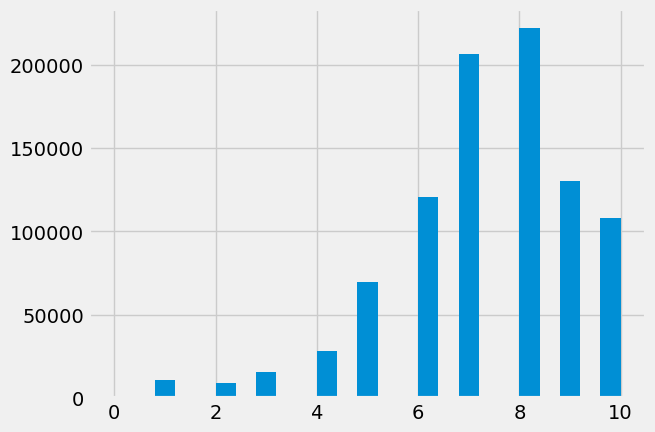

In [65]:
ratings['rating'].hist(bins=25);

In [66]:
len(users.user_id.unique())

71707

In [67]:
ratings.user_id.value_counts().describe()

count    71707.000000
mean        12.849485
std         45.557594
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max       2875.000000
Name: user_id, dtype: float64

In [68]:
dummies = movie_ratings['genre'].str.get_dummies()
dummies.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [69]:
dummies.sample()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1243974,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [70]:
tidy_movie_ratings = (pd.concat([movie_ratings, dummies], axis=1)
                     .drop(['rating_timestamp', 'genre'], axis=1)
                     )

In [71]:
tidy_movie_ratings['year'] = tidy_movie_ratings['movie_title'].str.extract(r'\((\d{4})\)')
tidy_movie_ratings['movie_title'] = tidy_movie_ratings['movie_title'].str.replace(r'\s*\(\d{4}\)','')
tidy_movie_ratings

C:\Users\harsh\AppData\Local\Temp\ipykernel_11904\751385073.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tidy_movie_ratings['movie_title'] = tidy_movie_ratings['movie_title'].str.replace(r'\s*\(\d{4}\)','')


,user_id,rating,movie_title,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,year
movie_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,43471,5,Edison Kinetoscopic Record of a Sneeze,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1894
10,71498,10,La sortie des usines Lumière,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1895
12,70439,10,The Arrival of a Train,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1896
25,38130,8,The Oxford and Cambridge University Boat Race,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1895
91,5887,6,Le manoir du diable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15711402,50282,6,Les rois de l&x27;arnaque,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
15831978,5608,7,Cash,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
15839820,45682,7,Sompoy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2021


In [74]:
tidy_movie_ratings.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 923235 entries, 8 to 16058736
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      923235 non-null  int64 
 1   rating       923235 non-null  int64 
 2   movie_title  923235 non-null  object
 3   Action       923235 non-null  int64 
 4   Adult        923235 non-null  int64 
 5   Adventure    923235 non-null  int64 
 6   Animation    923235 non-null  int64 
 7   Biography    923235 non-null  int64 
 8   Comedy       923235 non-null  int64 
 9   Crime        923235 non-null  int64 
 10  Documentary  923235 non-null  int64 
 11  Drama        923235 non-null  int64 
 12  Family       923235 non-null  int64 
 13  Fantasy      923235 non-null  int64 
 14  Film-Noir    923235 non-null  int64 
 15  Game-Show    923235 non-null  int64 
 16  History      923235 non-null  int64 
 17  Horror       923235 non-null  int64 
 18  Music        923235 non-null  int64 
 19  

In [75]:
tidy_movie_ratings["year"] = tidy_movie_ratings["year"].astype(int)


In [ ]:
condition = tidy_movie_ratings[""]